In [6]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [7]:
class Net(nn.Module):
    
    def __init__(self, hidden_size=8):
        super(Net, self).__init__()
        self.lin1 = nn.Linear(1,hidden_size)
        self.lin2 = nn.Linear(hidden_size,hidden_size)
        self.lin3 = nn.Linear(hidden_size,1)
        
    def forward(self, x):
        x = nn.ReLU()(self.lin1(x))
        x = nn.ReLU()(self.lin2(x))
        x = self.lin3(x)
        return x

In [8]:
def build_dataset(batch_size):
    features = list(torch.tensor([num]).float() for num in np.linspace(-10,10, 500))
    func = lambda num: 1+num**2
    targets = list(func(num) for num in features)
    return DataLoader(dataset=list(zip(features, targets)), batch_size=batch_size, shuffle=True)

In [9]:
def train(lr=1e-3, epochs=100, batch_size=32, hidden_size=8):
    
    net = Net(hidden_size)
    optimizer = torch.optim.Adam(lr=lr, params=net.parameters())
    dataloader = build_dataset(batch_size)
    losses = []

    for epoch in range(epochs):
        for batch in dataloader:
            x, y = batch
            net.zero_grad()
            out = net(x)
            loss = nn.MSELoss()(out, torch.tensor(y))
            loss.backward()
            optimizer.step()
            losses.append(loss.item())
            
    return net, losses

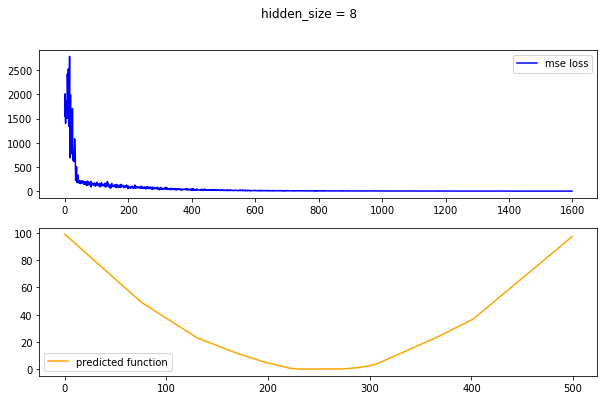

Lowest loss: 0.568022608757019


In [16]:
#hidden = 8
net1, loss1 = train(lr=1e-2, epochs=100, batch_size=32, hidden_size=8)
fig, axs = plt.subplots(2)
fig.set_size_inches(10, 6)
fig.suptitle('hidden_size = 8')
axs[0].plot(loss1, label='mse loss', c='blue')
axs[0].legend()
axs[1].plot([net1(feature).item() for feature in list(torch.tensor([num]).float() for num in np.linspace(-10,10, 500))], label='predicted function', c='orange')
axs[1].legend()
plt.show()
print("Lowest loss: {}".format(min(loss1)))

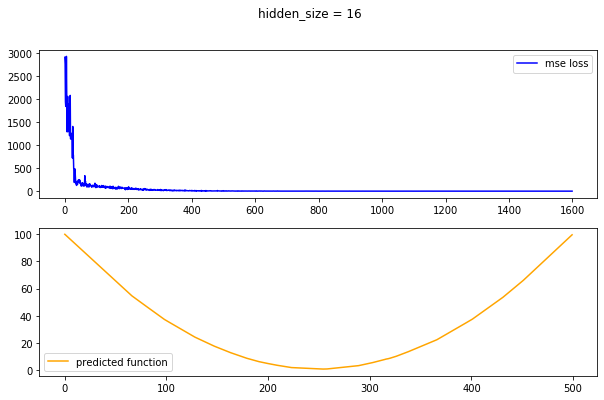

Lowest loss: 0.015005664899945259


In [17]:
#hidden = 16
net1, loss1 = train(lr=1e-2, epochs=100, batch_size=32, hidden_size=16)
fig, axs = plt.subplots(2)
fig.set_size_inches(10, 6)
fig.suptitle('hidden_size = 16')
axs[0].plot(loss1, label='mse loss', c='blue')
axs[0].legend()
axs[1].plot([net1(feature).item() for feature in list(torch.tensor([num]).float() for num in np.linspace(-10,10, 500))], label='predicted function', c='orange')
axs[1].legend()
plt.show()
print("Lowest loss: {}".format(min(loss1)))

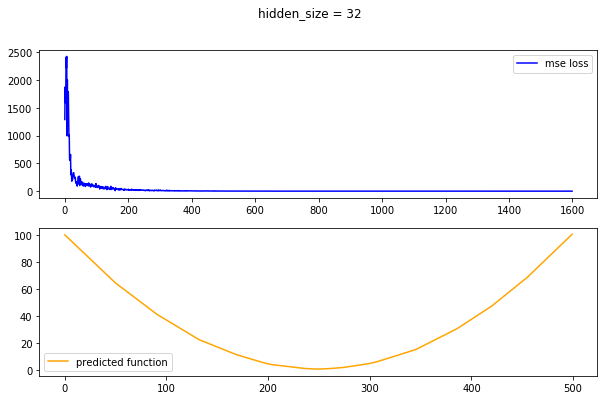

Lowest loss: 0.022220036014914513


In [18]:
#hidden = 32
net1, loss1 = train(lr=1e-2, epochs=100, batch_size=32, hidden_size=32)
fig, axs = plt.subplots(2)
fig.set_size_inches(10, 6)
fig.suptitle('hidden_size = 32')
axs[0].plot(loss1, label='mse loss', c='blue')
axs[0].legend()
axs[1].plot([net1(feature).item() for feature in list(torch.tensor([num]).float() for num in np.linspace(-10,10, 500))], label='predicted function', c='orange')
axs[1].legend()
plt.show()
print("Lowest loss: {}".format(min(loss1)))

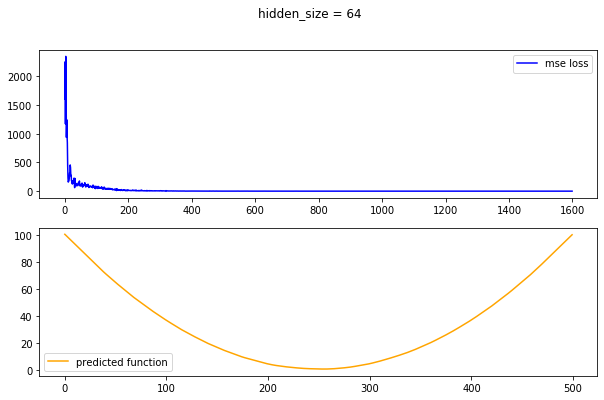

Lowest loss: 0.002799474634230137


In [19]:
#### hidden = 64
net1, loss1 = train(lr=1e-2, epochs=100, batch_size=32, hidden_size=64)
fig, axs = plt.subplots(2)
fig.set_size_inches(10, 6)
fig.suptitle('hidden_size = 64')
axs[0].plot(loss1, label='mse loss', c='blue')
axs[0].legend()
axs[1].plot([net1(feature).item() for feature in list(torch.tensor([num]).float() for num in np.linspace(-10,10, 500))], label='predicted function', c='orange')
axs[1].legend()
plt.show()
print("Lowest loss: {}".format(min(loss1)))

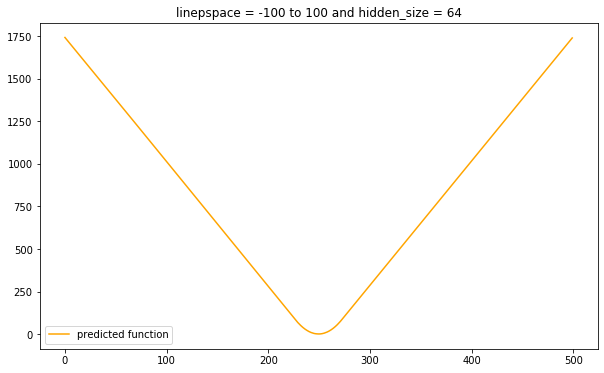

In [25]:
plt.figure(figsize=(10,6))
plt.plot([net1(feature).item() for feature in list(torch.tensor([num]).float() for num in np.linspace(-100,100, 500))], label='predicted function', c='orange')
plt.legend()
plt.title('linepspace = -100 to 100 and hidden_size = 64')
plt.show()